### TEST AVEC PLUSIEURS IMAGES

In [19]:
# Import des modules
import os
import random
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as scp
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.transform import resize

In [20]:
# Bloc de fonctions utiles 

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image en couleur
def display_image(image,title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    #plt.title(title)
    plt.axis('off')
    plt.show()

def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value


In [21]:
def convolve2d(image, h):
    # taille de l'image 
    image_height, image_width = image.shape
    # taille du filtre 
    kernel_height, kernel_width = h.shape
    
    # déterminer combien de pixels de remplissage sont nécessaires autour de l'image
    pad_height = kernel_height // 2  # Pour le haut et le bas
    pad_width = kernel_width // 2      # Pour la gauche et la droite

    # remplissage de zéros autour de l'image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # une image vide qui aura la même taille que l'image d'origine
    output = np.zeros_like(image)
    
    # appliquer le filtre à chaque pixel de l'image
    for i in range(image_height):
        for j in range(image_width):
            # section de l'image qui correspond à la taille du filtre
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # nouveau pixel en effectuant un calcul de moyenne pondérée
            output[i, j] = np.sum(region * h)
    
    return output

##### TEST AVEC DES IMAGES EN NIVEAU DE GRIS

In [22]:
# Importer et traiter une image
def import_image_gray(filename, target_size=(512, 512)):
    image = ski.io.imread(filename)
    
    # Redimensionner l'image
    image = resize(image, target_size, anti_aliasing=True)
    print(f"Image {filename} importée avec forme: {image.shape}")
    
    # Si l'image est en couleur (3 canaux), la convertir en niveaux de gris
    if image.ndim == 3 and image.shape[2] == 3:  
        image = rgb2gray(image)  
        print(f"Image convertie en niveaux de gris: {image.shape}")
    
    # Si l'image a 2 canaux (par exemple, alpha et RGB en 2D), on la transforme en un seul canal
    if image.ndim == 3 and image.shape[2] == 2:
        image = image[:, :, 0]
        print(f"Image avec 2 canaux convertie en niveaux de gris: {image.shape}")
        
    return np.array(image)

In [23]:
def get_images():
    images = []
    path = '../img_test/gris/pgm'
    for filename in os.listdir(path):
        if filename.endswith('.pgm'):
            print(f"Lecture du fichier: {filename}")
            image = import_image_gray(os.path.join(path, filename))
            if image is not None:
                print(f"Forme de l'image après redimensionnement: {image.shape}")
                images.append(image)
    return np.array(images)

images = get_images()
print(images.shape)

Lecture du fichier: airplaneU2.pgm
Image ../img_test/gris/pgm\airplaneU2.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: boats.pgm
Image ../img_test/gris/pgm\boats.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: bridge.pgm
Image ../img_test/gris/pgm\bridge.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: cameraman.pgm
Image ../img_test/gris/pgm\cameraman.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: clown.pgm
Image ../img_test/gris/pgm\clown.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: couple.pgm
Image ../img_test/gris/pgm\couple.pgm importée avec forme: (512, 512)
Forme de l'image après redimensionnement: (512, 512)
Lecture du fichier: crowd.pgm
Image ../img_test/gris/pgm\crowd.pgm

In [24]:
# Fonction pour ajouter du bruit à une image

# Bruit sel et poivre
def noise_salt_pepper(image, amount=0.05):
    image_noised = ski.util.random_noise(image, mode='s&p', amount=amount) * 255
    return image_noised.astype(np.uint8)

# Bruit gaussien
def noise_gaussian(image, var=0.01):
    image_noised = ski.util.random_noise(image, mode='gaussian', var=var) * 255
    return image_noised.astype(np.uint8)
 

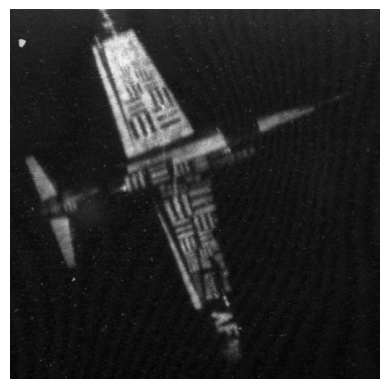

In [25]:
test_image = images[0]
display_image(test_image, 'Test image')

In [26]:
# Créer un tableau d'images bruitées

def get_noisy_image_salt_pepper(images):
    noisy_images = []
    for image in images:
        noisy_image = noise_salt_pepper(image)
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

def get_noisy_image_gaussian(images):
    noisy_images = []
    for image in images:
        noisy_image = noise_gaussian(image)
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

noisy_images_salt_pepper = get_noisy_image_salt_pepper(images)
noisy_images_gaussian = get_noisy_image_gaussian(images)

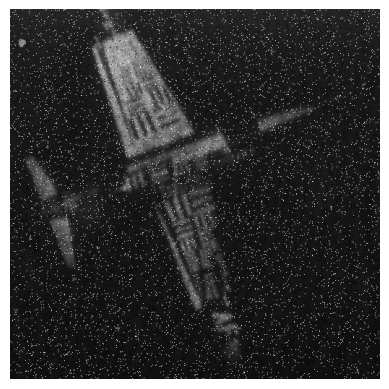

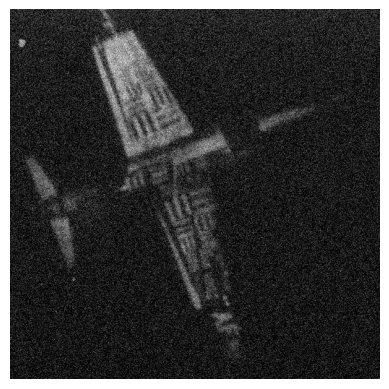

In [27]:
test_image_noisy_salt_pepper = noisy_images_salt_pepper[0]
test_image_noisy_gaussian = noisy_images_gaussian[0]
display_image(test_image_noisy_salt_pepper, 'Test image bruitée sel et poivre')
display_image(test_image_noisy_gaussian, 'Test image bruitée gaussien')

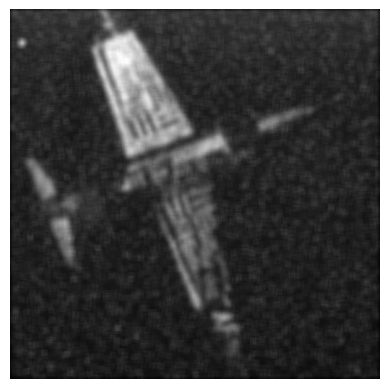

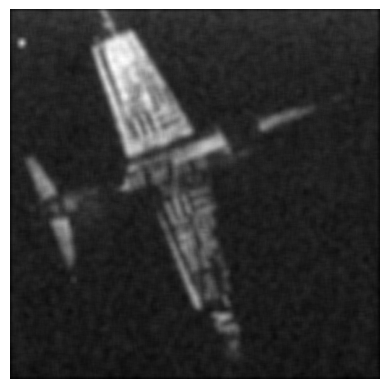

PSNR pour le bruit sel et poivre: 15.55838593401413
PSNR pour le bruit gaussien: 15.982478563644626


In [28]:
# Test debruitage
h2 = np.ones((9, 9))
h2 = 1/81 * h2
image_denoised_salt_pepper = convolve2d(test_image_noisy_salt_pepper, h2)
image_denoised_gaussian = convolve2d(test_image_noisy_gaussian, h2)

display_image(image_denoised_salt_pepper, 'Test image débruitée sel et poivre')
display_image(image_denoised_gaussian, 'Test image débruitée gaussien')

# Calcul du PSNR
psnr_salt_pepper = psnr(test_image, image_denoised_salt_pepper)
psnr_gaussian = psnr(test_image, image_denoised_gaussian)
print(f"PSNR pour le bruit sel et poivre: {psnr_salt_pepper}")
print(f"PSNR pour le bruit gaussien: {psnr_gaussian}")


In [29]:
# Afficage d'une courbe moyenne du psnr de l'image débruitée et de l'image originale des images pour le bruit sel et poivre

def image_denoising(images, noisy_images, h):
    denoised_images = []
    psnr_values = []
    for i in range(len(images)):
        image = images[i]
        noisy_image = noisy_images[i]
        denoised_image = convolve2d(noisy_image, h)
        denoised_images.append(denoised_image)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    return np.array(denoised_images), np.array(psnr_values)

def display_curb_psnr(psnr_means, title):
    plt.figure()
    plt.plot(psnr_means)
    plt.title(title)
    plt.xlabel('Taille du noyau')
    plt.ylabel('PSNR en dB')
    plt.show()

def create_kernel(i):
    kernel = np.ones((i, i))
    kernel = 1/(i*i) * kernel
    return kernel

In [ ]:
# Affichage de la courbe de PSNR pour le bruit gaussien en fonction de h (pour UNE image)
def display_psnr_curve_gaussian(image, noisy_image, title):
    psnr_values = []
    for i in range(1, 50):
        h = create_kernel(i)
        denoised_image = convolve2d(noisy_image, h)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    plt.figure()
    plt.plot(psnr_values)
    plt.title(title)
    plt.xlabel('Taille du noyau')
    plt.ylabel('PSNR en dB')
    plt.show()

In [31]:
# Affichage de la courbe de PSNR pour le bruit sel et poivre en fonction de h (pour UNE image)
def display_psnr_curve_salt_pepper(image, noisy_image, title):
    psnr_values = []
    for i in range(1, 50):
        h = create_kernel(i)
        denoised_image = convolve2d(noisy_image, h)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    plt.figure()
    plt.plot(psnr_values)
    plt.title(title)
    plt.xlabel('Taille du noyau')
    plt.ylabel('PSNR en dB')
    plt.show()

In [32]:
# Courbe moyenne psnr pour sel et poivre
# psnr_values_salt_pepper = []
# for i in range(1, 10):
#     h = create_kernel(i)
#     denoised_images, psnr_values = image_denoising(images, noisy_images_salt_pepper, h)
#     psnr_values_salt_pepper.append(np.mean(psnr_values))

# psnr_values_salt_pepper = np.array(psnr_values_salt_pepper)
# display_curb_psnr(psnr_values_salt_pepper, 'Courbe moyenne PSNR pour le bruit sel et poivre')

In [33]:
# Courbe moyenne psnr pour gaussien
# psnr_values_gaussian = []
# for i in range(1, 10):
#     h = create_kernel(i)
#     denoised_images, psnr_values = image_denoising(images, noisy_images_gaussian, h)
#     psnr_values_gaussian.append(np.mean(psnr_values))

# psnr_values_gaussian = np.array(psnr_values_gaussian)
# display_curb_psnr(psnr_values_gaussian, 'Courbe moyenne PSNR pour le bruit gaussien')

In [34]:
image_test_1 = images[0]
noisy_image_test_1_gaussian = noisy_images_gaussian[0]
noisy_image_test_1_salt_pepper = noisy_images_salt_pepper[0]

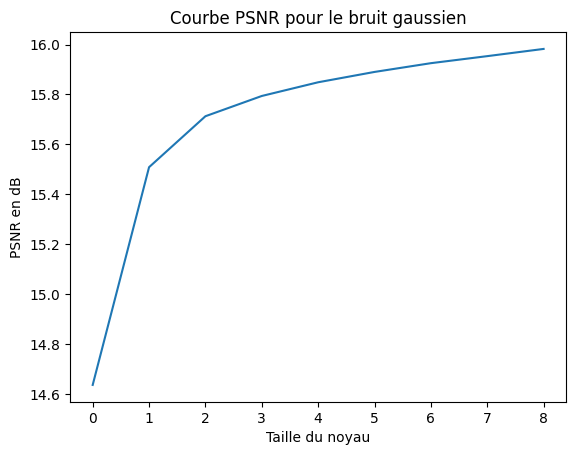

In [35]:
display_psnr_curve_gaussian(image_test_1, noisy_image_test_1_gaussian, 'Courbe PSNR pour le bruit gaussien')

In [ ]:
display_psnr_curve_salt_pepper(image_test_1, noisy_image_test_1_salt_pepper, 'Courbe PSNR pour le bruit sel et poivre')